In [1]:
import numpy as np
import scipy as sp
from scipy.constants import c
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tempi = np.array(
    [1e-2, -6e-2, -4.3e-2, -1.04e-2,
    -1.855, -2.073, -1.719, -2.16,
    -9.13e-1, -7.11e-1, -9.6e-1, -8.1e-1,
    -1.631, -1.514, -1.812, -1.679]
)
df=pd.DataFrame(tempi*1e-9, columns=['tempi'])
df['distanze'] = [0]*4 + [63e-2]*4 + [21e-2]*4 + [47e-2]*4

In [3]:
data=df.groupby('distanze').mean()
data['err_distanze']=0.5e-2
data['err_tempi']=df.groupby('distanze')['tempi'].agg(np.ptp)/2
data.reset_index(inplace=True)

In [4]:
data

,distanze,tempi,err_distanze,err_tempi
0,0.00,-2.585000e-11,0.005,3.500000e-11
1,0.21,-8.485000e-10,0.005,1.245000e-10
2,0.47,-1.659000e-09,0.005,1.490000e-10
3,0.63,-1.951750e-09,0.005,2.205000e-10


In [9]:
def modello(x, p, q):
    return x*p+q
popt, pcov = curve_fit(modello, data['distanze'], data['tempi'].abs(), absolute_sigma=True, sigma = data['err_tempi'])
st_error=np.sqrt(np.diag(pcov))
y=modello(data['distanze'], popt[0], popt[1])
chi=np.sum((y-data['tempi'])**2/data['err_tempi']**2)
print(chi)
print(f'velocità: {1/popt[0]*1e-8:.3f} ± {st_error[0]/popt[0]**2*1e-8:.3f}')
print(f'intercetta: {popt[1]*1e11:.3f} ± {st_error[1]*1e11:.3f}')

992.0745985202655
velocità: 2.979 ± 0.206
intercetta: 3.239 ± 3.454


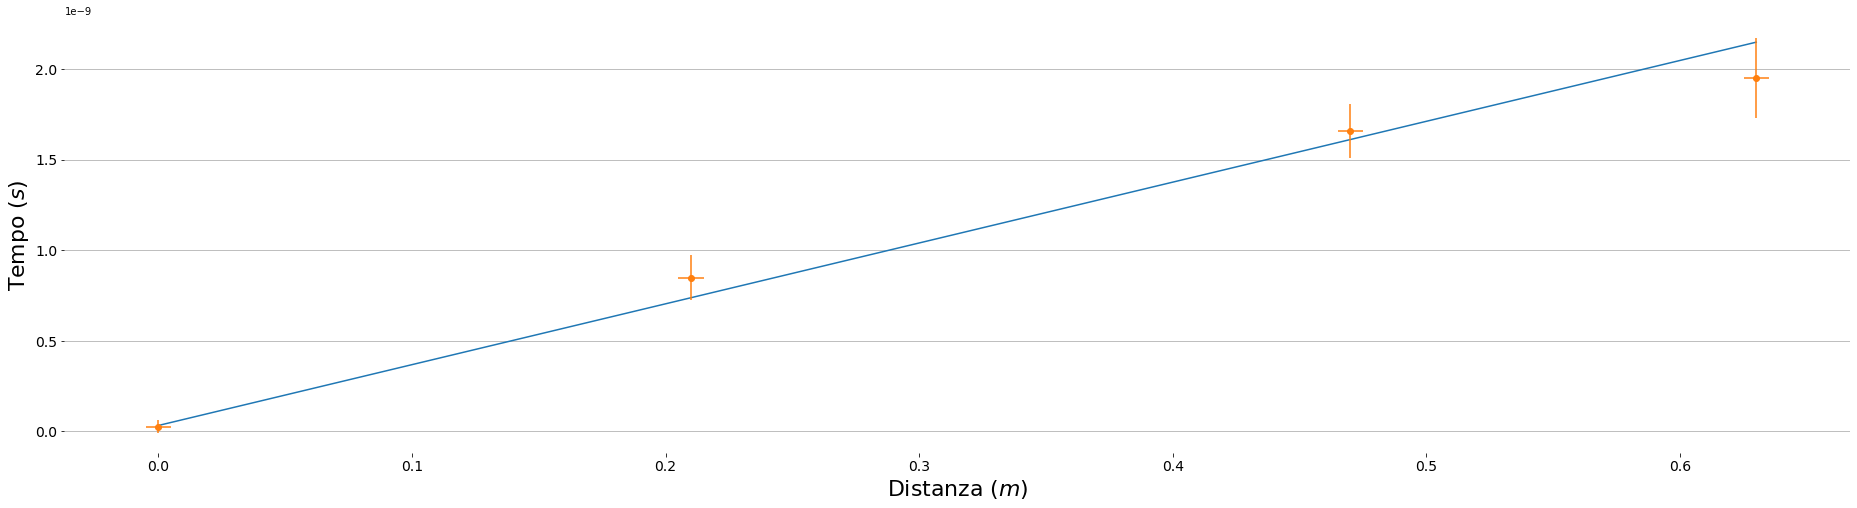

In [6]:
fig, ax1 = plt.subplots(nrows=1, ncols = 1, figsize = (32,8))
ax1.grid(axis = 'y')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
sns.lineplot(x=data['distanze'], y=y, ax=ax1)
ax1.errorbar(x=data['distanze'], y=data['tempi'].abs(), xerr=data['err_distanze'], yerr=data['err_tempi'], fmt='o')
ax1.set_ylabel('Tempo ($s$)', fontsize = 22)
ax1.set_xlabel('Distanza ($m$)', fontsize = 22)
ax1.tick_params(axis='both', which='major', labelsize=14)
#plt.savefig('fig1.svg', bbox_inches = "tight")